In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import csv
import pandas.util.testing as tm

import umap
import hdbscan

%matplotlib inline

In [38]:
df_= pd.read_csv('../data2/processed/18.04.2020_Dataframe_for_clustering', index_col = 0)

In [39]:
df_.head(1)

,id,vat,category,value,quantity,Label Printer_value,Label Printer_qty,Accessories_value,Accessories_qty,Printhead_value,...,Touch Screen & Computer_value,Touch Screen & Computer_qty,RFID_value,RFID_qty,Wristband_value,Wristband_qty,CNAE,provincia,provincia_encoded,cnae_encoded
0,125,A28415495,Label Printer,239.0,1.0,239.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3212 - Fabricación de artículos de joyería y ...,Madrid,30,199


In [41]:
df = df_.drop(['id','vat', 'category', 'provincia', 'CNAE','value','quantity','Accessories_value','Accessories_qty'], axis=1)
df

,Label Printer_value,Label Printer_qty,Printhead_value,Printhead_qty,Mobile Computing_value,Mobile Computing_qty,Scanner_value,Scanner_qty,Label_value,Label_qty,...,Tickets_value,Tickets_qty,Touch Screen & Computer_value,Touch Screen & Computer_qty,RFID_value,RFID_qty,Wristband_value,Wristband_qty,provincia_encoded,cnae_encoded
0,239.0,1.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,199
1,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,263
2,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,375
3,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,403
4,0.0,0.0,899.91,3.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8330,0.0,0.0,0.00,0.0,0.0,0.0,85.79,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,376
8331,0.0,0.0,0.00,0.0,0.0,0.0,472.50,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,307
8332,0.0,0.0,0.00,0.0,0.0,0.0,472.50,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,336
8333,0.0,0.0,0.00,0.0,0.0,0.0,366.41,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,411


# The UMAP reduction finally choosed

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 1min 18s, sys: 384 ms, total: 1min 18s
Wall time: 1min 16s


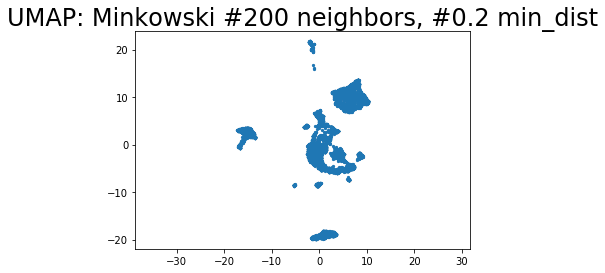

In [42]:
fit = umap.UMAP(
        n_neighbors=200,
        min_dist=0.2,
        n_components=2,
        metric='minkowski',
        random_state= 42)
%time u = fit.fit_transform(df)
plt.scatter(u[:, 0], u[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Minkowski #200 neighbors, #0.2 min_dist', fontsize=24);  

Applying the HDBSCAN to identify clusters


In [44]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=100)
clusterer.fit(u)
clusterer

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=100, min_samples=None, p=None,
        prediction_data=False)

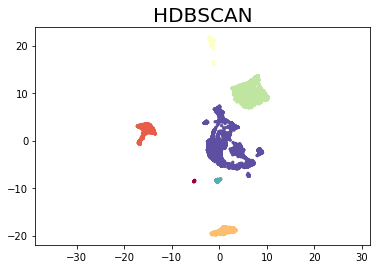

In [45]:
plt.scatter(u[:, 0], u[:, 1], c=clusterer.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(len(np.unique(clusterer.labels_)))+1).set_ticks(np.arange(len(np.unique(clusterer.labels_))))
plt.title('HDBSCAN', fontsize=20);

# Decido trabajar con esta clusterización

In [46]:
clusterer.labels_

array([0, 5, 5, ..., 3, 3, 5])

In [47]:
df_['clusters'] = clusterer.labels_

In [48]:
df_ = df_.drop(columns =(['category','value','quantity']))

In [49]:
df_['clusters'].value_counts()

 5    3722
 3    2099
 0     802
 1     647
 2     172
 4     141
-1      42
Name: clusters, dtype: int64

In [27]:
df_.to_csv('../data2/processed/ClusterizacionFinal.csv')